In [1]:
import argparse
import os
from random import randint
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import csv
import torch
import torchvision
from scipy.misc import imsave
from torch.utils.data import DataLoader



In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--which_data', default='val', choices=['train', 'val'])
parser.add_argument('--which_model', default='M1', choices=['M1', 'M2'])
parser.add_argument('--M1_DIR', default='/home/dell/Documents/sg2im-master/output_BARs/')
parser.add_argument('--M2_DIR', default='/home/dell/Documents/scene_generation-master/output_BARs/')

_StoreAction(option_strings=['--M2_DIR'], dest='M2_DIR', nargs=None, const=None, default='/home/dell/Documents/scene_generation-master/output_BARs/', type=None, choices=None, help=None, metavar=None)

In [27]:
def main(args):
#     now = datetime.now()
#     current_time = now.strftime("%H_%M_%S")  
#     model_name = args.which_model +'_'+ args.which_data
#     RUN_DIR = os.path.join('tb_all_models', str(model_name), current_time)
#     print(RUN_DIR)
#     writer = SummaryWriter(RUN_DIR)
    
    
    if(args.which_model == 'M1'):
        directory = args.M1_DIR + args.which_data
    else:
        directory = args.M2_DIR + args.which_data
#     print(directory)


    
    file_names = os.listdir(directory) 
    file_names = list(filter(lambda x: x.endswith('.csv'), file_names))
    for file_name in sorted(file_names):           
        file_dir = os.path.join(directory, file_name)
        print(file_name)
        title1 = file_name[0:-4]+'_(1)'
        title2 = file_name[0:-4]+'_(2)'
        data = pd.read_csv(file_dir)

        data.index = ['5%', '10%', '20%', '50%', '100%']
        ax = data.plot.bar(rot=45, title = title1, ylim=(0,1))#,colormap='Paired'
        ax.legend(bbox_to_anchor=(1, 1),prop={'size': 6})
#         ax.legend(loc='upper right',prop={'size': 5})
        fig = ax.get_figure()
        fig.savefig(directory +'/figs/'+title1+'.png')
        
        dataT = data.T        
        dataT = dataT.drop(['model'])#index='model'

        ax = dataT.plot.bar(rot=45, title = title2, ylim=(0,1))#,colormap='Paired'
        ax.legend(bbox_to_anchor=(1, 1),prop={'size': 6})
        fig = ax.get_figure()
        fig.savefig(directory+'/figs/'+title2+'.png')
#         break
        

   

bm_FH64_acc.csv
bm_FH_acc.csv
bm_FHrec64_acc.csv
bm_FHrec_acc.csv
bm_acc.csv


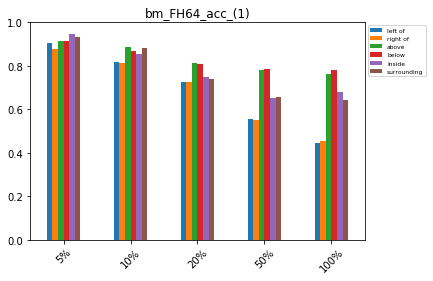

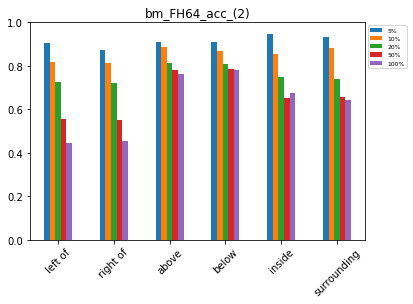

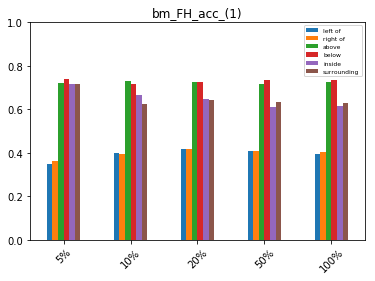

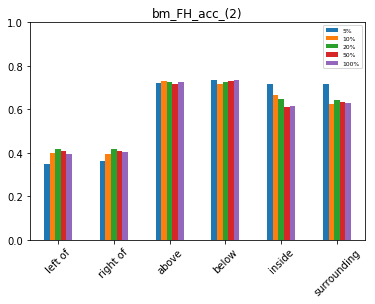

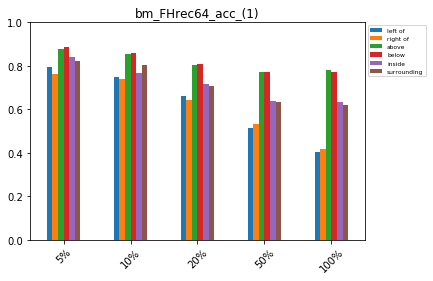

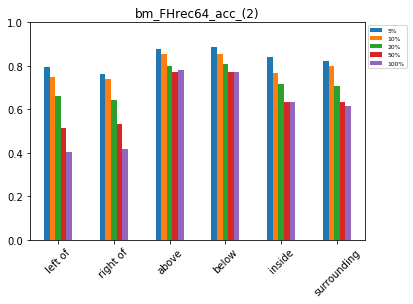

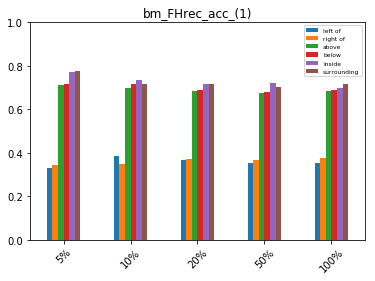

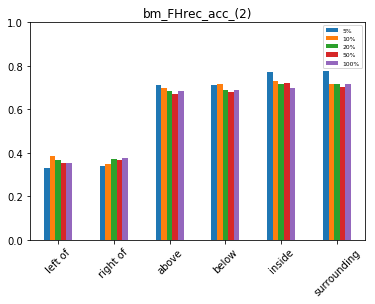

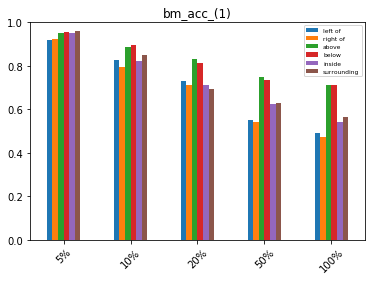

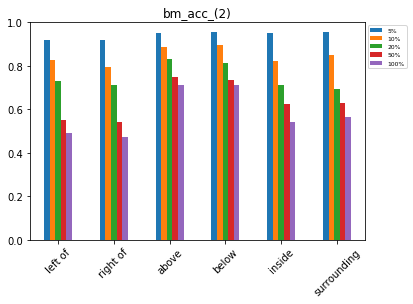

In [28]:
if __name__ == '__main__':
  args, _ = parser.parse_known_args()
  main(args)

In [ ]:
#     checkpoint_file = [ 'checkpoint_with_model_50000.pt', 
#                        'checkpoint_with_model_100000.pt',
#                        'checkpoint_with_model_200000.pt',
#                        'checkpoint_with_model_500000.pt',
#                        'checkpoint_with_model_full.pt'
#                         ]